<a href="https://colab.research.google.com/github/kkharon/iS/blob/main/Task_11_12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Вариант 5

# Первый набор данных

https://archive.ics.uci.edu/dataset/52/ionosphere

In [ ]:
!pip install ucimlrepo

In [ ]:
!pip install umap-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.9/90.9 kB 1.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 kB 5.2 MB/s eta 0:00:00
  Created wheel for umap-learn: filename=umap_learn-0.5.5-py3-none-any.whl size=86832 sha256=e04eb62affbdd5a2a93dc1e2df5baa46331ac721699fdcd9492a523bc867940b
  Stored in directory: /root/.cache/pip/wheels/3a/70/07/428d2b58660a1a3b431db59b806a10da736612ebbc66c1bcc5
Successfully built umap-learn


In [ ]:
from ucimlrepo import fetch_ucirepo
import pandas as pd
import numpy as np

from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.metrics import silhouette_score, adjusted_rand_score, homogeneity_score, completeness_score, v_measure_score

from yellowbrick.cluster import KElbowVisualizer

from sklearn.manifold import TSNE
import umap.umap_ as umap
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import warnings
warnings.filterwarnings('ignore')

Загрузка датасета

In [ ]:
# fetch dataset
ionosphere = fetch_ucirepo(id=52)

# data (as pandas dataframes)
X = ionosphere.data.features
y = ionosphere.data.targets

X

,Attribute1,Attribute2,Attribute3,Attribute4,Attribute5,Attribute6,Attribute7,Attribute8,Attribute9,Attribute10,...,Attribute25,Attribute26,Attribute27,Attribute28,Attribute29,Attribute30,Attribute31,Attribute32,Attribute33,Attribute34
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,...,0.56811,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.20332,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,0.57528,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,1.00000,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000
4,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,0.03286,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,1,0,0.83508,0.08298,0.73739,-0.14706,0.84349,-0.05567,0.90441,-0.04622,...,0.95378,-0.04202,0.83479,0.00123,1.00000,0.12815,0.86660,-0.10714,0.90546,-0.04307
347,1,0,0.95113,0.00419,0.95183,-0.02723,0.93438,-0.01920,0.94590,0.01606,...,0.94520,0.01361,0.93522,0.04925,0.93159,0.08168,0.94066,-0.00035,0.91483,0.04712
348,1,0,0.94701,-0.00034,0.93207,-0.03227,0.95177,-0.03431,0.95584,0.02446,...,0.93988,0.03193,0.92489,0.02542,0.92120,0.02242,0.92459,0.00442,0.92697,-0.00577
349,1,0,0.90608,-0.01657,0.98122,-0.01989,0.95691,-0.03646,0.85746,0.00110,...,0.91050,-0.02099,0.89147,-0.07760,0.82983,-0.17238,0.96022,-0.03757,0.87403,-0.16243


In [ ]:
y.value_counts()

Class
g        225
b        126
dtype: int64

<Axes: xlabel='Class', ylabel='count'>

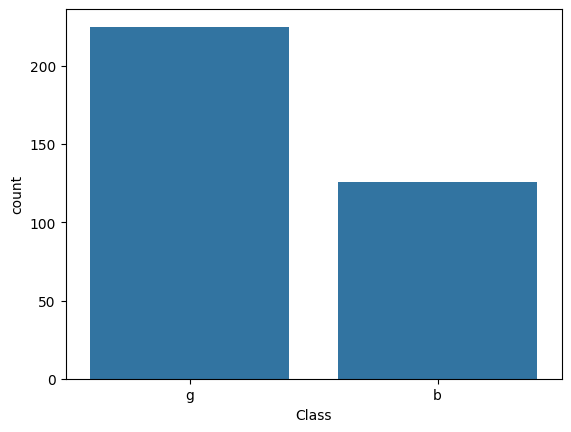

In [ ]:
sns.countplot(x='Class', data=y)

In [ ]:
# преобразуем в тип int
y.Class = y.Class.map({'g': 1, 'b': 0}).astype(int)

## Кластеризация

In [ ]:
# Попробуем разное количество кластеров от 2 до 10
n_clusters = range(2, 11)

### Иерархическая

In [ ]:
# Иерархическая кластеризация (Agglomerative Clustering)
silhouette_scores = []
inertia_values = []

for n in n_clusters:
    agg_clustering = AgglomerativeClustering(n_clusters=n)
    labels = agg_clustering.fit_predict(X)
    silhouette_scores.append(silhouette_score(X, labels))

Для иерархической кластеризации для анализа оптимального числа кластеров воспользуеся индексом силуэта.

Agglomerative Clustering не имеет встроенного атрибута инерции, который используется в методе локтя для K-means, поэтому метод локтя не применим к Agglomerative Clustering напрямую.

Вместо метода локтя для Agglomerative Clustering часто используют индекс силуэта (Silhouette Score) для оценки оптимального числа кластеров. Индекс силуэта — это метрика, которая измеряет, насколько объект хорошо соответствует своему собственному кластеру по сравнению с другими кластерами. Более высокий силуэт указывает на более четкое разделение кластеров.

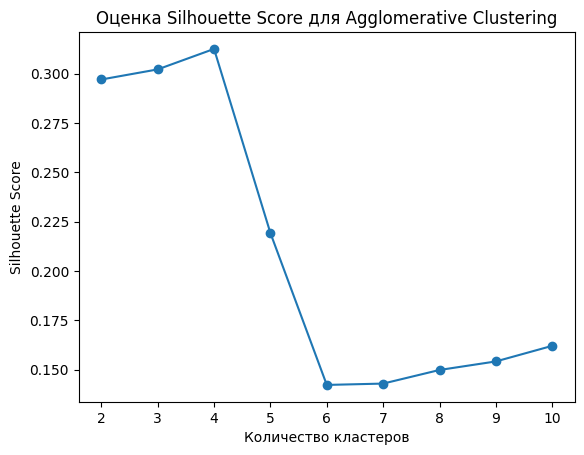

In [ ]:
plt.plot(n_clusters, silhouette_scores, marker='o')
plt.xlabel('Количество кластеров')
plt.ylabel('Silhouette Score')
plt.title('Оценка Silhouette Score для Agglomerative Clustering')
plt.show()

На графике выше, видим, что максмальный индекс силуэта достигается при числе кластеров = 4. Но (если смотреть шкалу y) разница между числом кластеров = 2 и =3 минимальна.

Воспользуемся библиотекой KElbowVisualizer, которая автоматически вычисляет оптимальное значение числа кластеров

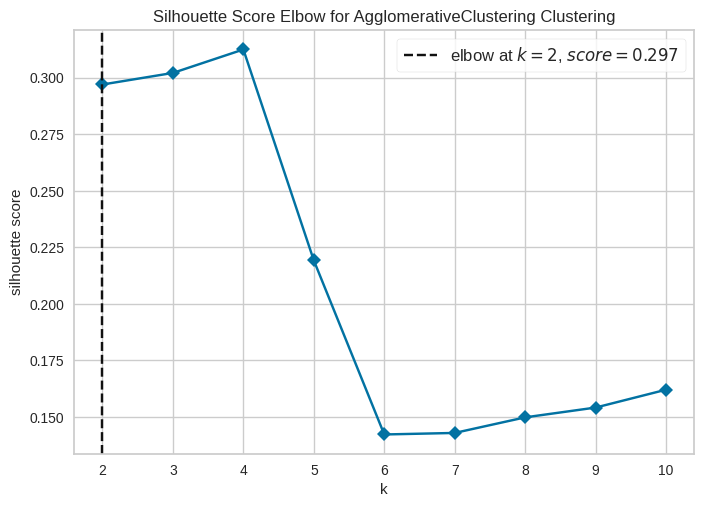

<Axes: title={'center': 'Silhouette Score Elbow for AgglomerativeClustering Clustering'}, xlabel='k', ylabel='silhouette score'>

In [ ]:
visualizer_silhouette = KElbowVisualizer(AgglomerativeClustering(), k=n_clusters, metric='silhouette', timings=False)
visualizer_silhouette.fit(X)
visualizer_silhouette.show()

KElbowVisualizer, все таки показал, что оптимальное число кластеров = 2. И он прав, так как значение целевой переменной y бинарно (значение y мы не передавали, кластеризация не знает какая у нас задача).

### Итерационная

In [ ]:
silhouette_scores = []
inertia_values = []

for n in n_clusters:
    kmeans = KMeans(n_clusters=n)
    kmeans.fit(X)
    silhouette_scores.append(silhouette_score(X, kmeans.labels_))
    inertia_values.append(kmeans.inertia_)

Визуализация результатов

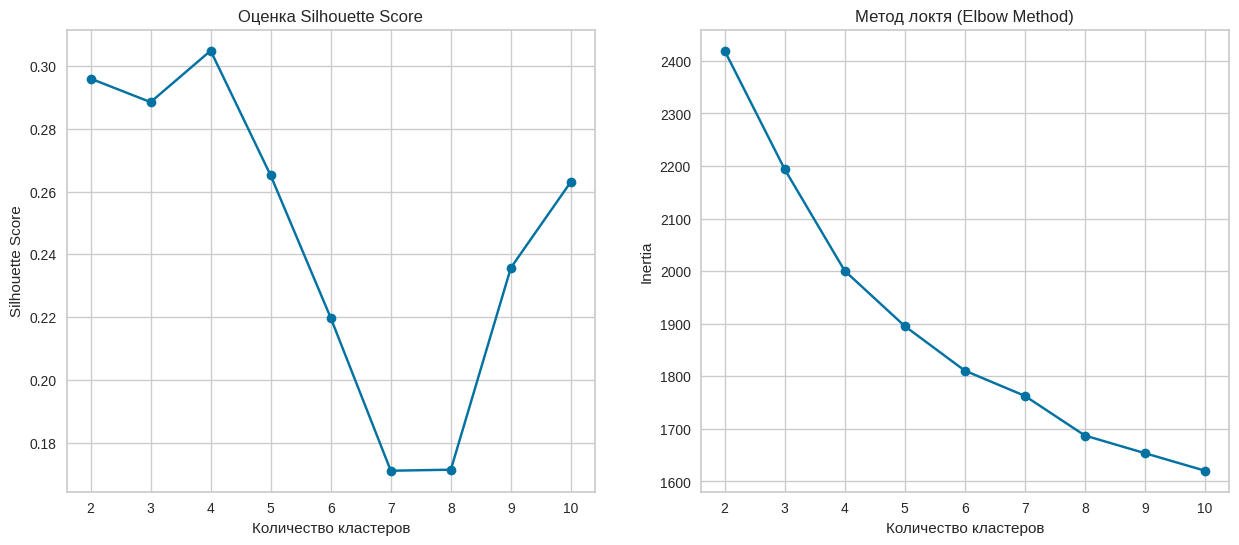

In [ ]:
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
plt.plot(n_clusters, silhouette_scores, marker='o')
plt.xlabel('Количество кластеров')
plt.ylabel('Silhouette Score')
plt.title('Оценка Silhouette Score')

plt.subplot(1, 2, 2)
plt.plot(n_clusters, inertia_values, marker='o')
plt.xlabel('Количество кластеров')
plt.ylabel('Inertia')
plt.title('Метод локтя (Elbow Method)')

plt.show()

Воспользуемся библиотекой KElbowVisualizer, которая автоматически вычисляет оптимальное значение числа кластеров

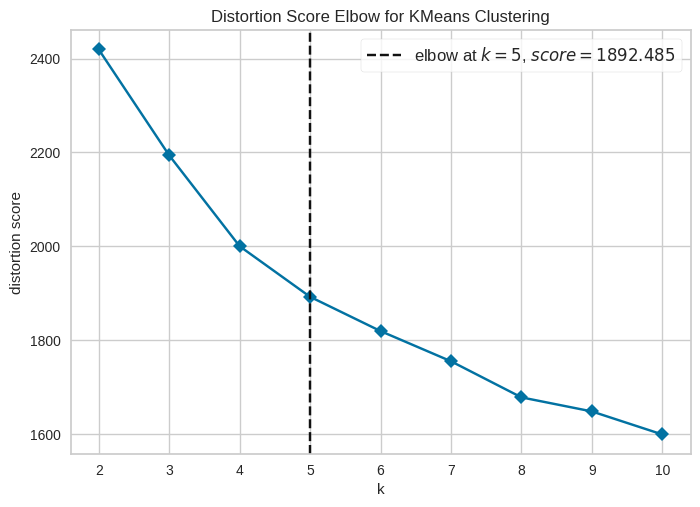

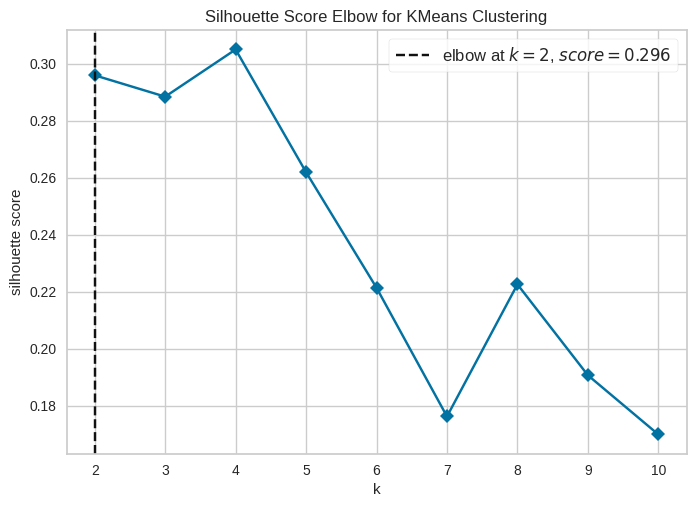

<Axes: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [ ]:
visualizer_sse = KElbowVisualizer(KMeans(), k=n_clusters, colors='bold', timings=False)
visualizer_sse.fit(X)
visualizer_sse.show()

visualizer_silhouette = KElbowVisualizer(KMeans(), k=n_clusters, metric='silhouette', timings=False)
visualizer_silhouette.fit(X)
visualizer_silhouette.show()

Метод "локтя" показал оптимальное число кластеров = 5, а индекс силуэта значение 2.

In [ ]:
kmeans = KMeans(n_clusters=2)
predicted_labels = kmeans.fit_predict(X)

# Оцениваем качество кластеризации с помощью ARI
ari = adjusted_rand_score(y.Class, predicted_labels)
homogeneity = homogeneity_score(y.Class, predicted_labels)
completeness = completeness_score(y.Class, predicted_labels)
v_measure = v_measure_score(y.Class, predicted_labels)

print('Kmeans (число кластеров = 2)')
print("Adjusted Rand Index (ARI):", ari)
print("Homogeneity:", homogeneity)
print("Completeness:", completeness)
print("V-measure:", v_measure)

Kmeans (число кластеров = 2)
Adjusted Rand Index (ARI): 0.17760685473768603
Homogeneity: 0.13866866513813614
Completeness: 0.13124912608683412
V-measure: 0.13485692093441004


In [ ]:
agg_clustering = AgglomerativeClustering(n_clusters=2)
predicted_labels = agg_clustering.fit_predict(X)

ari = adjusted_rand_score(y.Class, predicted_labels)
homogeneity = homogeneity_score(y.Class, predicted_labels)
completeness = completeness_score(y.Class, predicted_labels)
v_measure = v_measure_score(y.Class, predicted_labels)

print('AgglomerativeClustering (число кластеров = 2)')
print("Adjusted Rand Index (ARI):", ari)
print("Homogeneity:", homogeneity)
print("Completeness:", completeness)
print("V-measure:", v_measure)

AgglomerativeClustering (число кластеров = 2)
Adjusted Rand Index (ARI): 0.18717419199615046
Homogeneity: 0.14231607517885123
Completeness: 0.13512243720505424
V-measure: 0.13862599511789814


Сравнивая значения метрик, можно сделать вывод, что **AgglomerativeClustering** показывает немного лучшие результаты по ARI, Homogeneity, Completeness и V-measure по сравнению с KMeans для данного конкретного набора данных и числа кластеров.

## Визуализация с помощью t-sne и UMAP

Рисунки разбиения на классы на основе выборок с известными
метками классов и рисунки разбиения на классы с метками кластеризации:

**tsne**

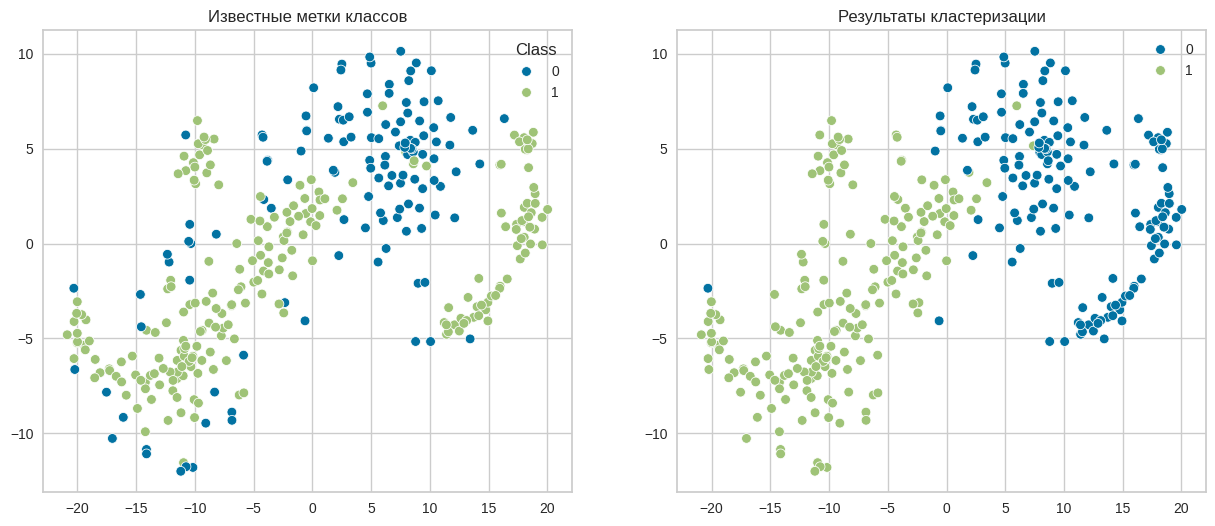

In [ ]:
# Визуализация с помощью t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)

plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=y.Class, legend='full')
plt.title('Известные метки классов')

plt.subplot(1, 2, 2)
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=predicted_labels, legend='full')
plt.title('Результаты кластеризации')

plt.show()

AgglomerativeClustering не использует понятие "центр" кластера, как, KMeans, где центр кластера представляет собой среднее значение всех точек в кластере. Поэтому на графиках он не обозначен.

**umap**

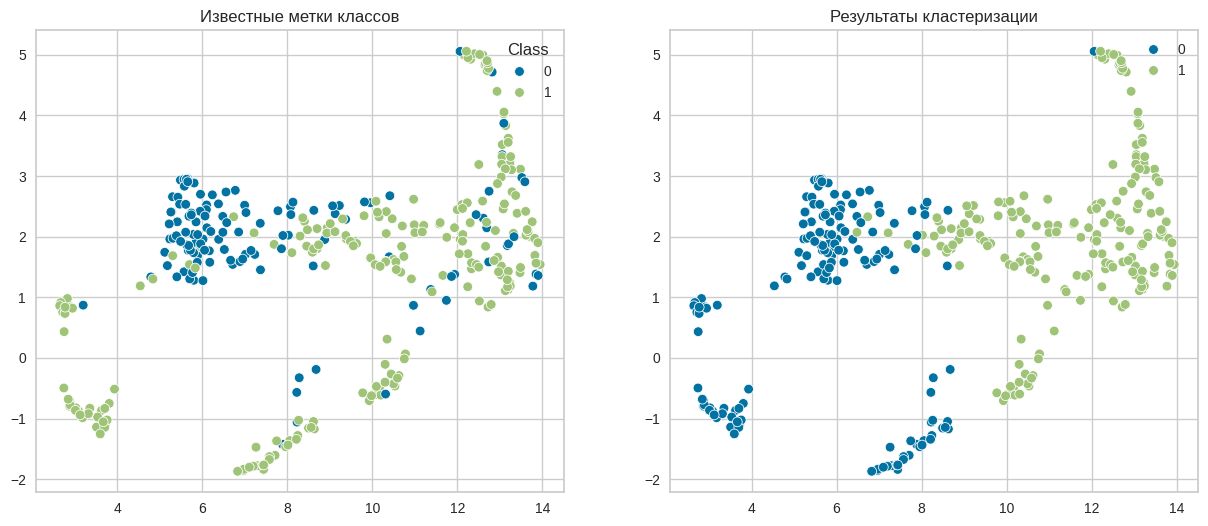

In [ ]:
fit = umap.UMAP()
X_umap = fit.fit_transform(X)

plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(x=X_umap[:, 0], y=X_umap[:, 1], hue=y.Class, legend='full')
plt.title('Известные метки классов')

plt.subplot(1, 2, 2)
sns.scatterplot(x=X_umap[:, 0], y=X_umap[:, 1], hue=predicted_labels, legend='full')
plt.title('Результаты кластеризации')

plt.show()

Кластеризация неплохо справилась со своей задачей,но есть ошибки, связанные с нелинейностью данных и выбросами

# Второй набор данных

Повторим все шаги для второго набора данных

ссылка на датасет https://archive.ics.uci.edu/dataset/321/electricityloaddiagrams20112014

Набор данных с неизвестными метками классов.

Загрузка датасета

Датасет содержит 140256 столбцов, но многие их них нулевые или имеют тип object

In [ ]:
# предобработка исходного датасета
# года старше 2012 содержат все нулевые строки - отбрасываем их
data_ecl = pd.read_csv('LD2011_2014.txt', parse_dates=True, sep=';', decimal=',', index_col=0)

data_ecl = data_ecl.resample('1h', closed='right').sum()
# отфильтровать экземпляры с пропущенными значениями
data_ecl = data_ecl.loc[:, data_ecl.cumsum(axis=0).iloc[8920] != 0]
data_ecl.index = data_ecl.index.rename('date')
data_ecl = data_ecl['2012':]
# сохраняем в новый файл с расширением .csv и далее работаем с ним
data_ecl.to_csv('electricity.csv')

In [ ]:
# обрежем при загрузке датасета колонку с датой
electricity = pd.read_csv('electricity.csv').iloc[:, 1:]
electricity.head()

,MT_001,MT_002,MT_003,MT_004,MT_005,MT_006,MT_007,MT_008,MT_009,MT_010,...,MT_360,MT_361,MT_362,MT_363,MT_364,MT_365,MT_366,MT_367,MT_368,MT_369
0,16.497462,91.038407,309.296264,552.845528,289.024390,1392.857143,34.482759,1117.845118,291.958042,351.612903,...,876.096491,482.512491,103900.0,6042.194093,6636.363636,62.581486,51.492101,2096.575944,243.739566,2854.105572
1,19.035533,92.460882,309.296264,548.780488,280.487805,1357.142857,27.699265,1104.377104,269.230769,329.032258,...,808.114035,451.106353,95500.0,4388.185654,6613.636364,63.885267,42.129901,2200.175593,245.409015,2823.313783
2,16.497462,91.749644,309.296264,546.747967,265.853659,1145.833333,26.568683,959.595960,255.244755,288.172043,...,813.596491,410.421128,96600.0,4278.481013,6568.181818,63.885267,38.619075,1996.488147,203.672788,2756.598240
3,19.035533,88.193457,309.296264,408.536585,201.219512,767.857143,19.219898,801.346801,166.083916,184.946237,...,797.149123,259.814418,93400.0,4168.776371,6318.181818,73.011734,38.619075,1320.456541,188.647746,2724.340176
4,17.766497,87.482219,309.296264,327.235772,180.487805,622.023810,14.132278,720.538721,183.566434,169.892473,...,804.824561,295.503212,90300.0,4130.801688,6272.727273,62.581486,35.108250,1314.310799,190.317195,2741.202346


In [ ]:
electricity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10091 entries, 0 to 10090
Columns: 370 entries, MT_001 to MT_370
dtypes: float64(161), int64(49), object(160)
memory usage: 28.5+ MB


In [ ]:
X = electricity

In [ ]:
# набор данных довольно большой, кластеризация займет время
X.shape

(26304, 321)

## Кластеризация

### Иерархическая

In [ ]:
# Иерархическая кластеризация (Agglomerative Clustering)
silhouette_scores = []
inertia_values = []

for n in n_clusters:
    print(f'process {n}...')
    agg_clustering = AgglomerativeClustering(n_clusters=n)
    labels = agg_clustering.fit_predict(X)
    silhouette_scores.append(silhouette_score(X, labels))

process 2...
process 3...
process 4...
process 5...
process 6...
process 7...
process 8...
process 9...
process 10...


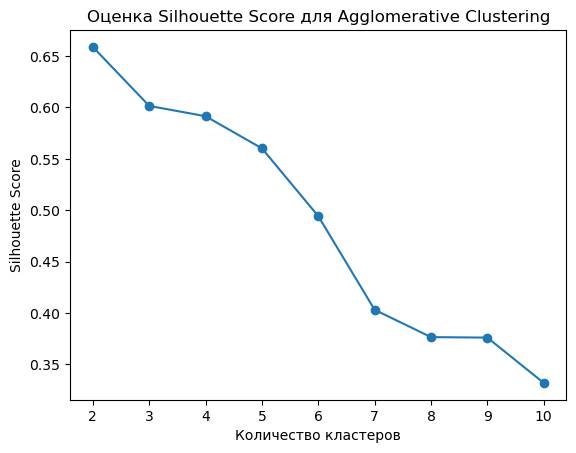

In [ ]:
plt.plot(n_clusters, silhouette_scores, marker='o')
plt.xlabel('Количество кластеров')
plt.ylabel('Silhouette Score')
plt.title('Оценка Silhouette Score для Agglomerative Clustering')
plt.show()

Оптимальное число кластеров = 2

### Итерационная

In [ ]:
silhouette_scores = []
inertia_values = []

for n in n_clusters:
    print(f'process {n}...')
    kmeans = KMeans(n_clusters=n)
    kmeans.fit(X)
    silhouette_scores.append(silhouette_score(X, kmeans.labels_))
    inertia_values.append(kmeans.inertia_)

process 2...
process 3...
process 4...
process 5...
process 6...
process 7...
process 8...
process 9...
process 10...


Визуализация результатов

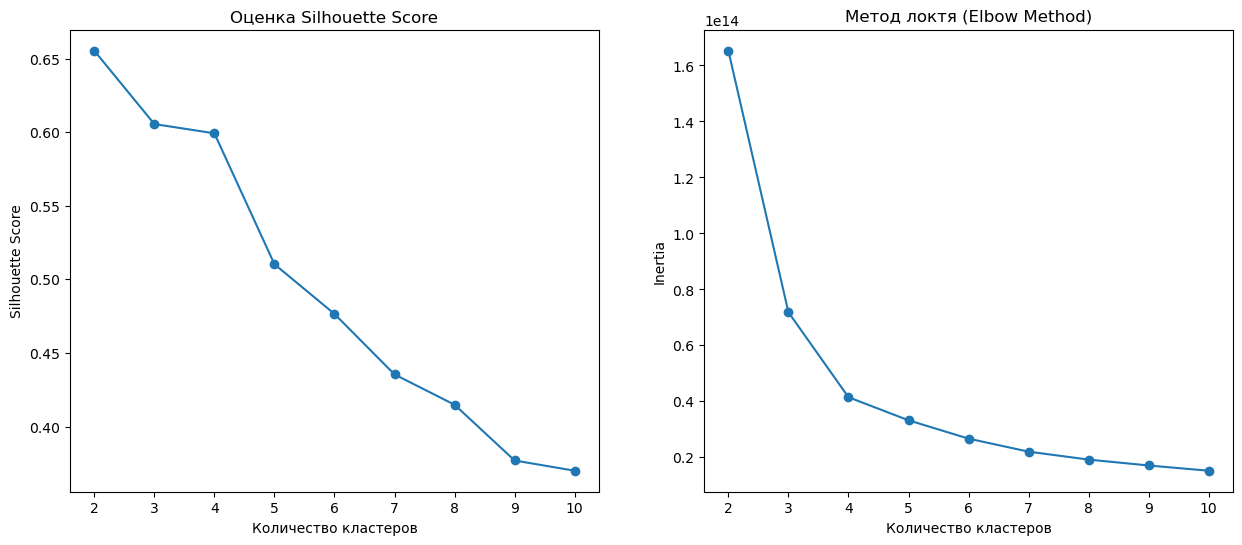

In [ ]:
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
plt.plot(n_clusters, silhouette_scores, marker='o')
plt.xlabel('Количество кластеров')
plt.ylabel('Silhouette Score')
plt.title('Оценка Silhouette Score')

plt.subplot(1, 2, 2)
plt.plot(n_clusters, inertia_values, marker='o')
plt.xlabel('Количество кластеров')
plt.ylabel('Inertia')
plt.title('Метод локтя (Elbow Method)')

plt.show()

По индексу силуэта - оптимальное число кластеров = 2. А по методу локтя оптимальное число кластеров = 4.

Выполним кластеризацию на 2 кластера обоими методами и визуализируем результат:

In [ ]:
agg_clustering = AgglomerativeClustering(n_clusters=2)
labels_agg = agg_clustering.fit_predict(X)

kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
labels_kmeans = kmeans.labels_

Визуализация результата кластеризации:

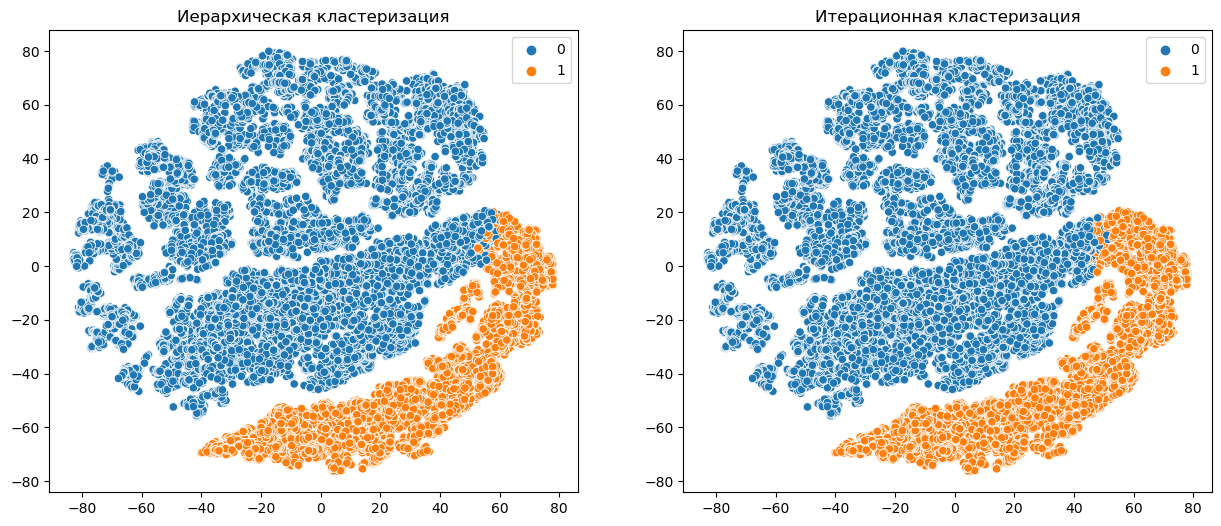

In [ ]:
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)

plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=labels_agg, legend='full')
plt.title('Иерархическая кластеризация')

plt.subplot(1, 2, 2)
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=labels_kmeans, legend='full')
plt.title('Итерационная кластеризация')

plt.show()